In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array


### Cargar y visualizar la imagen

img_array.shape =  (152, 158, 1)


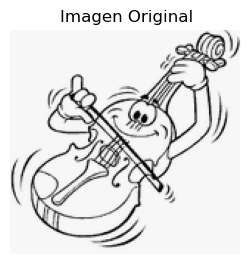

In [3]:
# Cargar la imagen en tonos de gris
img_path = DATOS_DIR + 'dibu_Violin.png'  # Reemplaza con la ruta de tu imagen
img = load_img(img_path, color_mode='grayscale')
img_array = img_to_array(img)

print("img_array.shape = ", img_array.shape)
img_alto = img_array.shape[0]
img_ancho = img_array.shape[1]

# Visualizar la imagen original
plt.figure(figsize=(3, 3))
plt.imshow(img_array.squeeze(), cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()

### Filtro a utilizar

In [4]:
# Detección sw bordes horizontales
#filtro = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype='float32')

# Detección de bordes en diagonal
filtro = np.array([[-1,0], [0, 1]], dtype='float32')
#filtro = np.array([[1,0], [0, -1]], dtype='float32')
print(filtro)

[[-1.  0.]
 [ 0.  1.]]


### Hiperparámetros

In [5]:
K = filtro.shape[0]  #tamaño del kernel

S = 1 # stride
P = 'valid'   # sin padding

### Definir el modelo secuencial con una capa convolucional

In [6]:
model = Sequential()

# Añadir la capa convolucional al modelo
# La capa tendrá 1 filtro (kernel) de tamaño 3x3, sin padding y con stride de 1
model.add(Conv2D(1, (K,K), strides=(S,S), padding=P, 
                 input_shape=(img_alto, img_ancho, 1), use_bias=False))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 151, 157, 1)       4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


### Asignar el filtro a la capa convolucional

In [7]:
# Redimensionar el filtro a (K, K, 1, 1) para que sea compatible con la capa Conv2D
# Las dimensiones son: altura del filtro, ancho del filtro, canales de entrada, canales de salida o cantidad de filtros)
# (height, width, channels, filters)
# -------------------------------------------------------------------------------------------------
filtro_Conv = filtro.reshape((K,K, 1, 1))
print("filtro_Conv.shape = ", filtro_Conv.shape)

# Configurar los pesos de la capa convolucional con el filtro personalizado
model.layers[0].set_weights([filtro_Conv])

filtro_Conv.shape =  (2, 2, 1, 1)


### Aplicar el filtro a la imagen

1/1 [==============================] - 0s 208ms/step


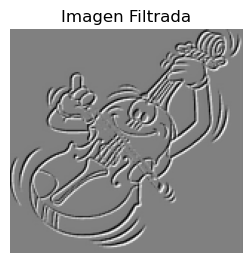

In [8]:
# Ajustar el tamaño de la imagen para que sea compatible con el modelo

# Keras espera que las entradas del modelo tengan una forma de (batch_size, height, width, channels), donde:
#                                                               -----------------------------------
# -- batch_size es el número de imágenes en un lote (batch). Aquí usamos 1 porque estamos pasando una sola imagen.
# -- height es la altura de la imagen, que sigue siendo 158.
# -- width es el ancho de la imagen, que sigue siendo 152.
# -- channels es el número de canales de la imagen, que sigue siendo 1.

img_array = img_array.reshape((1, img_alto, img_ancho, 1))  
filtered_image = model.predict(img_array)

# Visualizar la imagen resultante
plt.figure(figsize=(3,3))
plt.imshow(filtered_image.squeeze(), cmap='gray')
plt.title('Imagen Filtrada')
plt.axis('off')
plt.show()